<a href="https://colab.research.google.com/github/nirmal428/MachineLearning/blob/main/KMean_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Mean Clustering

K-Means is an unsupervised machine learning algorithm used for clustering data into K distinct groups based on similarity

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [4]:
x,y=make_blobs(n_samples=1000,centers=3,cluster_std=0.60,random_state=0,n_features=2)

In [5]:
x.shape

(1000, 2)

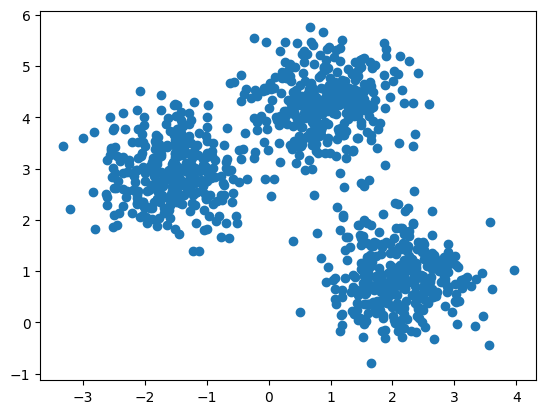

In [8]:
plt.scatter(x[:,0],x[:,1])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[3922.2689422804315,
 1593.039206065496,
 532.5429560842281,
 471.8196433310555,
 407.9638579781789,
 347.84691247017395,
 303.90160857571044,
 295.66476441013543,
 252.05385022703763,
 215.8507434541011]

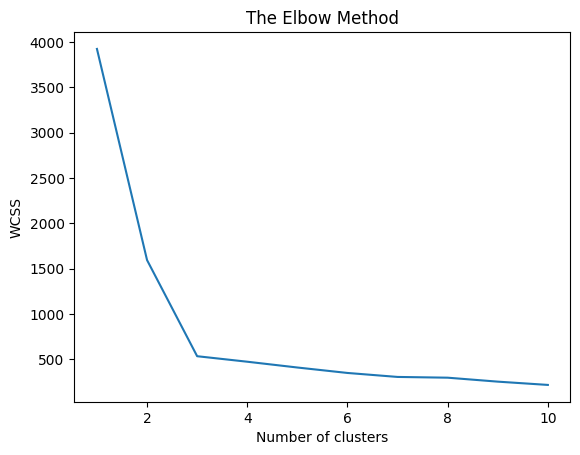

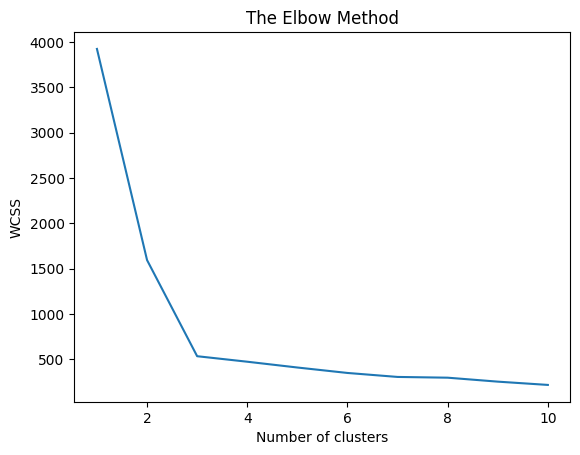

In [17]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)

In [20]:
y_labels=kmeans.fit_predict(x_train)

In [23]:
y_test_test=kmeans.predict(x_test)

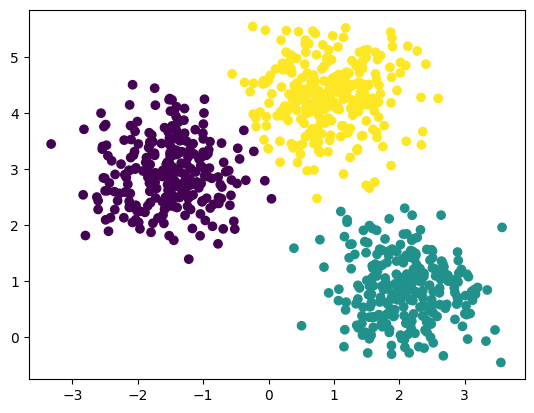

In [21]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

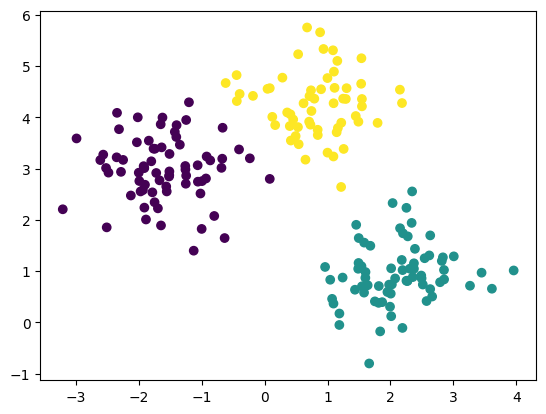

In [24]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_test)

knee locator

In [25]:
!pip install kneed

In [27]:
from kneed import KneeLocator

In [29]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [30]:
kl.elbow

np.int64(3)

performance Metrics

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_coefficient=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficient.append(score)


In [34]:
silhouette_coefficient

[np.float64(0.5690863838331518),
 np.float64(0.6576757179527823),
 np.float64(0.5243117588892177),
 np.float64(0.4079080471059145),
 np.float64(0.327023577753706),
 np.float64(0.3391256692994322),
 np.float64(0.32653769429333224),
 np.float64(0.33609375927436713),
 np.float64(0.3396594451144136)]

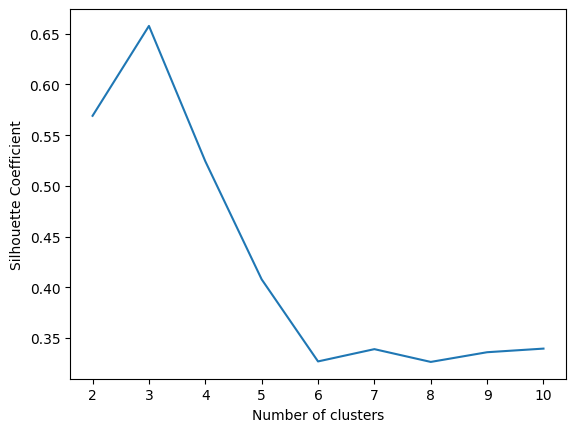

In [35]:
plt.plot(range(2,11),silhouette_coefficient)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()